<a href="https://colab.research.google.com/github/Saeed-Akbari/CS5783-MachineLearning/blob/main/Assignment1/problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# specify a seed so that result won't change after each run
np.random.seed(37)

In [24]:
class linearRegression():

    # constructor function for initializing some variables (learning rate, epochs, features and labels of training set)
    def __init__(self, X, Y, learning_rate, epochs):
        self.X = X
        self.Y = Y
        self.lr = learning_rate
        self.epochs = epochs

    # inner product of bases and weights
    def h(self, x, theta, b):
        return np.matmul(x, theta) + b

    def CostFunction(self, X, Y, w, b):
        cost = np.sum(((self.h(X, w, b) - Y).T@(self.h(X, w, b) - Y)) / (2*len(Y)))
        return cost

    # training process - finding weights and baises with gradient descent optimization
    def fit(self):

        w = np.zeros(self.X.shape[1])
        b = 0

        cost_list = []   
        for _ in range(self.epochs):

            yhat = self.X.dot(w) + b
            loss = yhat - self.Y
            
            # calculating gradients
            wGradient = self.X.T.dot(loss) / len(self.Y)
            bGradient = np.sum(loss) / len(self.Y)
            
            # updating weights and biases
            w = w - self.lr * wGradient
            b = b - self.lr * bGradient
    
            cost = self.CostFunction(self.X, self.Y, w, b)
            cost_list.append(cost)
            
        return w, b, cost_list

In [25]:
# load data
# Change the path to where you have saved the input files.

path="/content/drive/MyDrive/machineLearning/Assignment1/Assignment1_Q2_Data.csv"
df = pd.read_csv(path)

# drop unimportant features and take the rest of the features
features = df.drop(["House ID", "Price (1000$)"], axis=1)
# convert features from a pandas data frame to a numpy array
features = features.to_numpy()
# take the last column as labels
labels = df.iloc[: , -1].to_numpy()

In [26]:
# some hyperparameters

trainingSetSize = 28  # size of training set can be 28 or less, which is equal
                      # to have 0 element in test set or more.
learningRate = 0.005  # learning rate
epochs = 5000

In [27]:
# take features and labels of training and test sets
indices = np.random.permutation(features.shape[0])    # randomely take some indices
# take random indices for training and test sets
training_idx, test_idx = indices[:trainingSetSize], indices[trainingSetSize:features.shape[0]]
# take the sets
xtrain, xtest = features[training_idx,:], features[test_idx,:]
ytrain, ytest = labels[training_idx], labels[test_idx]

In [28]:
# take mean and standard deviation of features of the training set for standardization
meanX = np.mean(xtrain, axis=0)
stdX = np.std(xtrain, axis=0)
# standardize features of the trainig set
xtrainSt = (xtrain - meanX) / stdX

In [29]:
# build a model of the linear regression with training set and hyperparameters
model = linearRegression(xtrainSt, ytrain, learningRate, epochs)

In [30]:
# train the model and take weights, baiases, and a list of costs over epochs
w, b, Jall= model.fit()

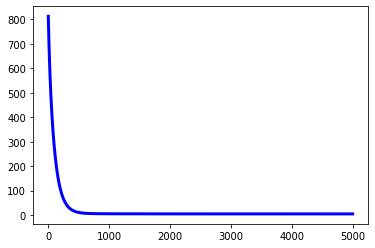

In [31]:
# plot cost over epochs
indFig = 0
plt.figure(indFig)
plt.plot(range(epochs), Jall, 'b', linewidth = "3")
plt.savefig("cost.png")

In [32]:
# make a prediction using trained model parameters (w and b)
Ypred = xtrain.dot(w) + b

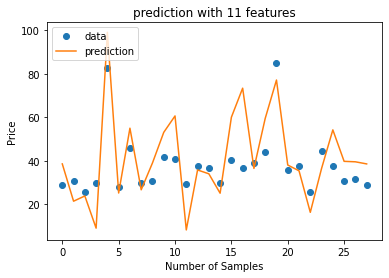

In [33]:
# plot the result of predition
indFig += 1
plt.figure(indFig)
plt.plot(np.arange(len(ytrain)), ytrain, "o", label="data")
plt.plot(np.arange(len(Ypred)), Ypred, label="prediction")
plt.xlabel('Number of Samples')
plt.ylabel('Price')
plt.title("prediction with 11 features")
plt.legend(loc="upper left")
plt.savefig('prediction.png')

To find the most and the least important features, I am going to train new models by either dropping a feature or keeping only one feature.

In this part, I am going to keep only one feature for training new models.

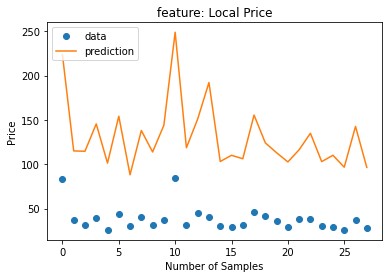

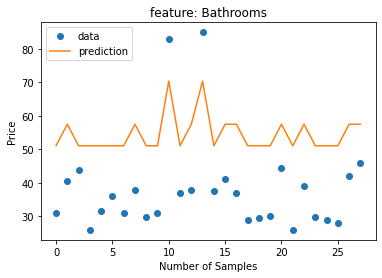

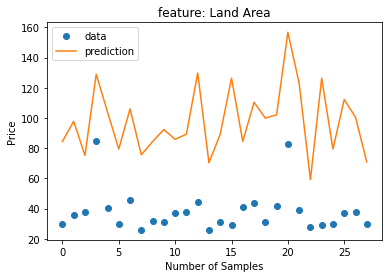

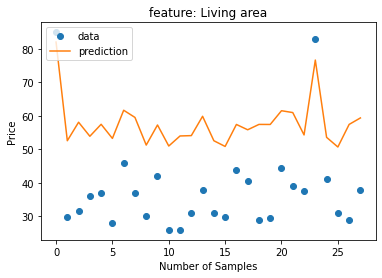

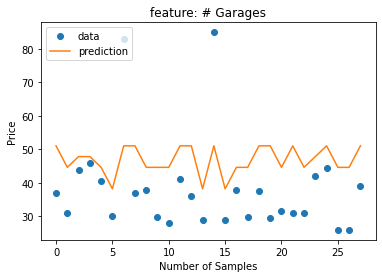

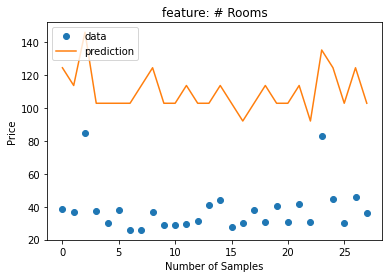

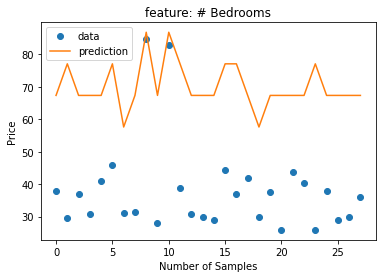

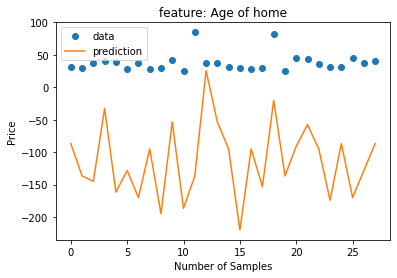

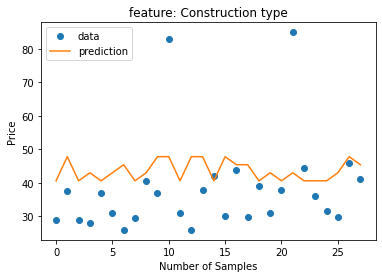

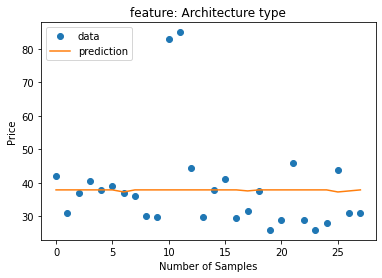

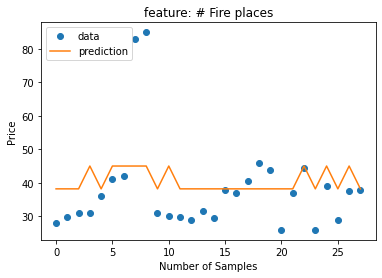

In [34]:
# Each model in this cell is trained with only one feature.

featureList = ["Local Price", "Bathrooms", "Land Area", "Living area", "# Garages", "# Rooms", "# Bedrooms",\
                "Age of home", "Construction type", "Architecture type", "# Fire places"]

indFig=0
cost = []
for feature in featureList:

    features = df.drop(["House ID", "Price (1000$)"], axis=1)
    features = features.filter(like=feature)
    features = features.to_numpy()
    labels = df.iloc[: , -1].to_numpy()

    indices = np.random.permutation(features.shape[0])
    training_idx, test_idx = indices[:trainingSetSize], indices[trainingSetSize:features.shape[0]]
    xtrain, xtest = features[training_idx,:], features[test_idx,:]
    ytrain, ytest = labels[training_idx], labels[test_idx]

    meanX = np.mean(xtrain, axis=0)
    stdX = np.std(xtrain, axis=0)
    xtrainSt = (xtrain - meanX) / stdX

    model = linearRegression(xtrainSt, ytrain, learningRate, epochs)

    w, b, Jall= model.fit()

    Ypred = xtrain.dot(w) + b
    YpredTest = xtest.dot(w) + b

    indFig += 1
    plt.figure(indFig)
    plt.plot(np.arange(len(ytrain)), ytrain, "o", label="data")
    plt.plot(np.arange(len(Ypred)), Ypred, label="prediction")
    plt.xlabel('Number of Samples')
    plt.ylabel('Price')
    plt.title("feature: "+feature)
    plt.legend(loc="upper left")
    plt.savefig("prediction_"+feature+".png")

    cost.append(Jall[-1])

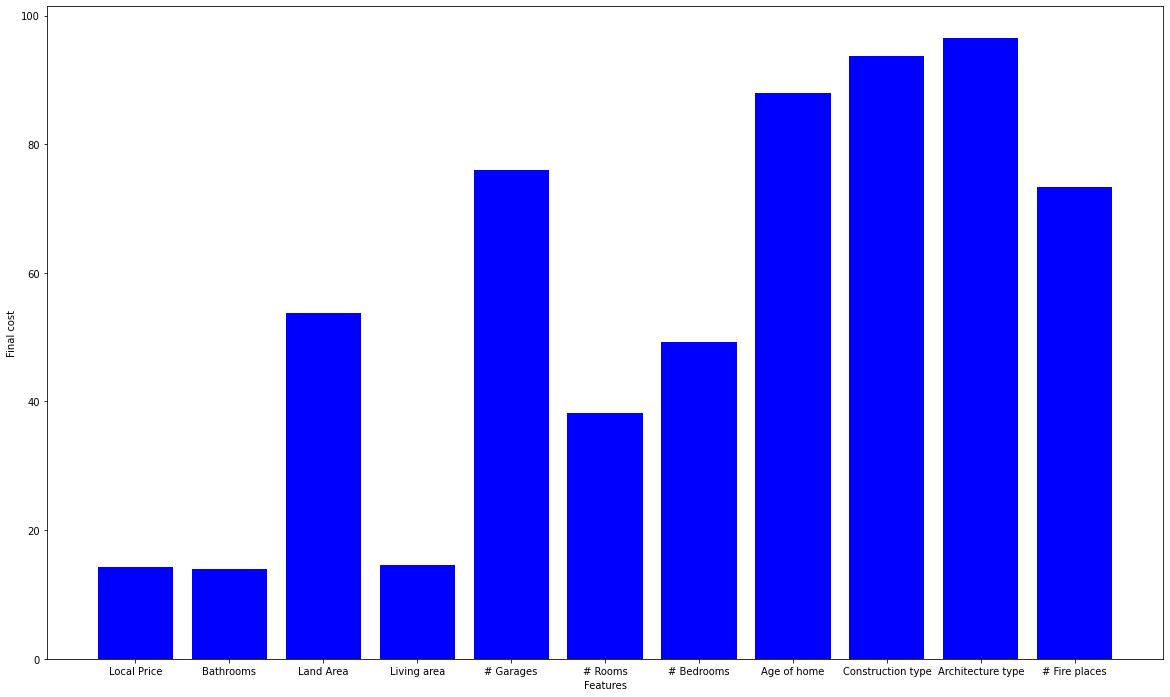

In [35]:
# This is a histogram of error when we use only one feature for each model
indFig += 1
plt.figure(indFig,figsize=(20, 12))
plt.bar(range(len(featureList)), cost, color='b')
plt.xlabel('Features')
plt.ylabel('Final cost')
plt.xticks(range(len(featureList)), featureList)
#plt.title('')
plt.savefig("costFeatures")

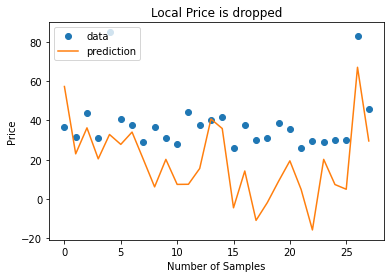

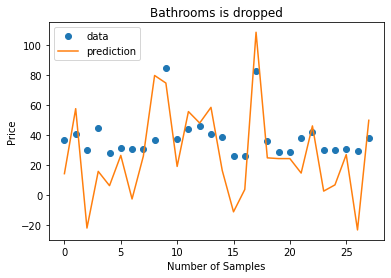

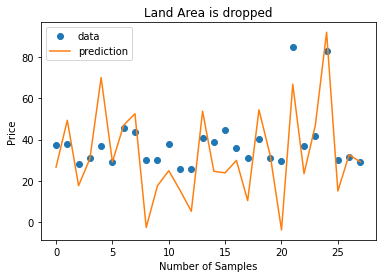

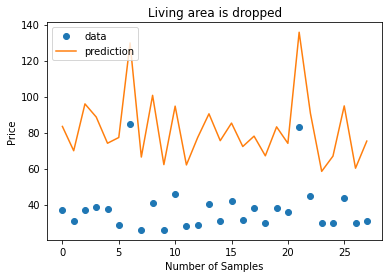

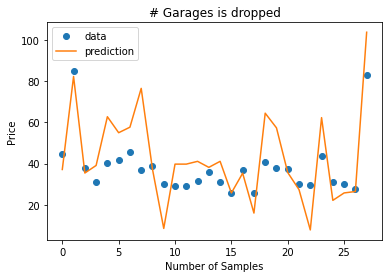

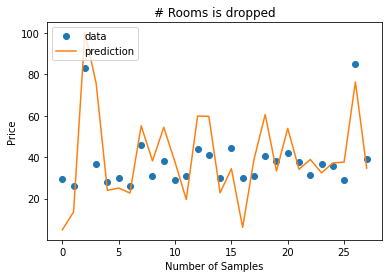

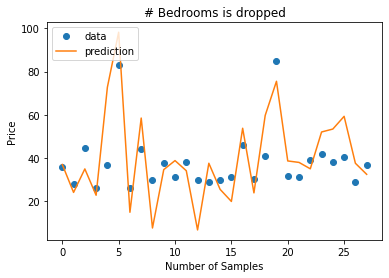

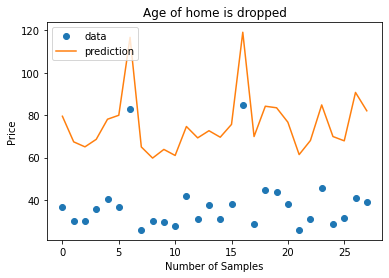

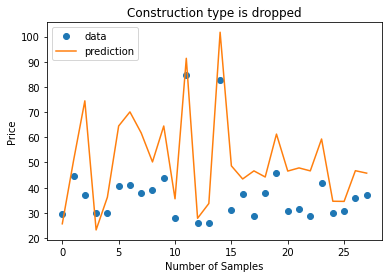

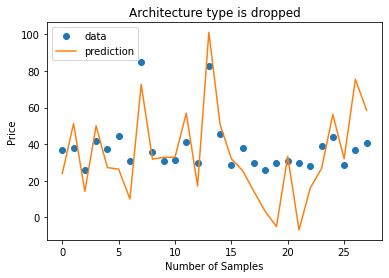

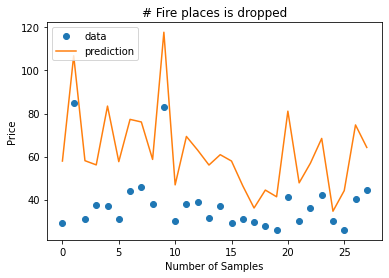

In [36]:
# Each model is trained with all features except one feature.
# For each training we drop only one feature.

featureList = ["Local Price", "Bathrooms", "Land Area", "Living area", "# Garages", "# Rooms", "# Bedrooms",\
                "Age of home", "Construction type", "Architecture type", "# Fire places"]

indFig=0
cost = []
for feature in featureList:

    features = df.drop(["House ID", "Price (1000$)", feature], axis=1)
    features = features.to_numpy()
    labels = df.iloc[: , -1].to_numpy()

    trainingSetSize = 28
    learningRate = 0.005
    epochs = 5000

    indices = np.random.permutation(features.shape[0])
    training_idx, test_idx = indices[:trainingSetSize], indices[trainingSetSize:features.shape[0]]
    xtrain, xtest = features[training_idx,:], features[test_idx,:]
    ytrain, ytest = labels[training_idx], labels[test_idx]

    meanX = np.mean(xtrain, axis=0)
    stdX = np.std(xtrain, axis=0)
    xtrainSt = (xtrain - meanX) / stdX

    model = linearRegression(xtrainSt, ytrain, learningRate, epochs)

    w, b, Jall= model.fit()

    Ypred = xtrain.dot(w) + b
    YpredTest = xtest.dot(w) + b

    indFig += 1
    plt.figure(indFig)
    plt.plot(np.arange(len(ytrain)), ytrain, "o", label="data")
    plt.plot(np.arange(len(Ypred)), Ypred, label="prediction")
    plt.xlabel('Number of Samples')
    plt.ylabel('Price')
    plt.title(feature+" is dropped")
    plt.legend(loc="upper left")
    plt.savefig("prediction_"+feature+"_drop.png")

    cost.append(Jall[-1])

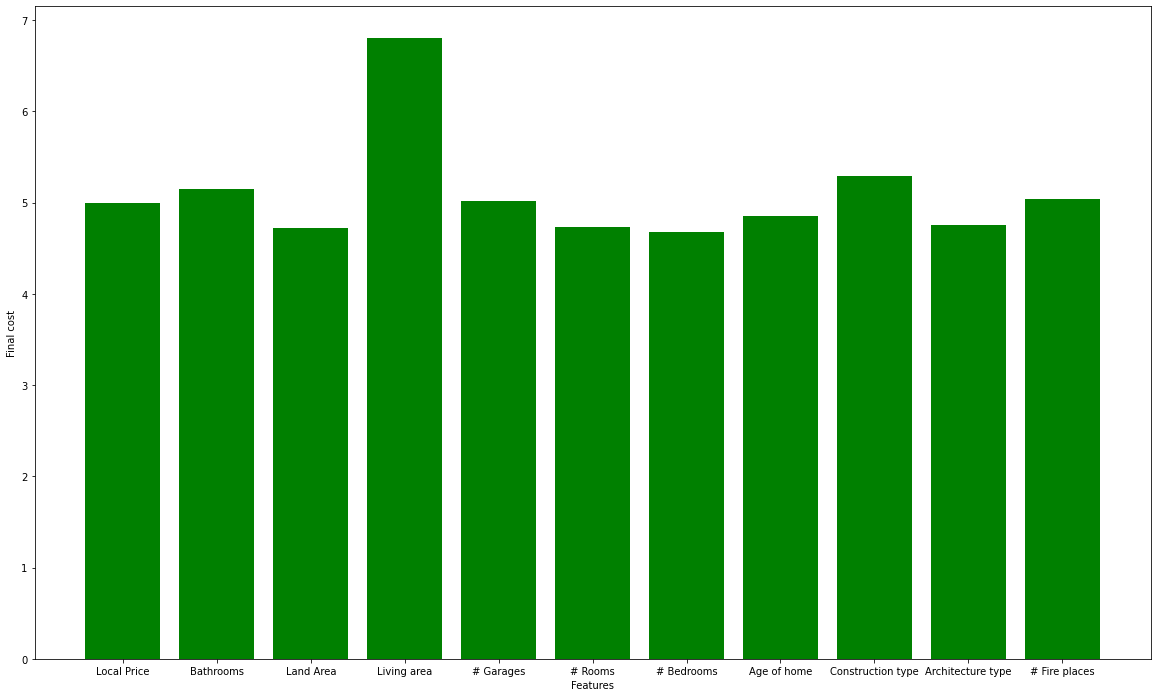

In [37]:
# This is a histogram of error when we use only one feature for each model
indFig += 1
plt.figure(indFig,figsize=(20, 12))
plt.bar(range(len(featureList)), cost, color='g')
plt.xlabel('Features')
plt.ylabel('Final cost')
plt.xticks(range(len(featureList)), featureList)
#plt.title('')
plt.savefig("costFeatures")

4.785511837995415


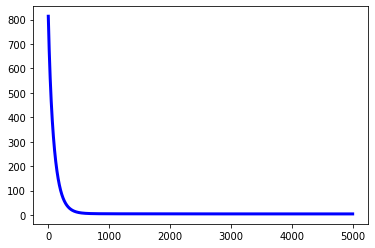

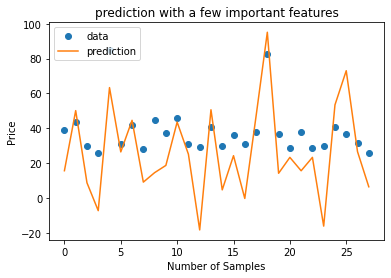

In [59]:
# In this cell I am going to keep a few important features and
# remove the rest of them.
# "Bathrooms", , "# Rooms", "# Bedrooms"
# "Land Area", "# Garages",
# , "# Fire places"
#unimportantFeatureList = [\
#                "Age of home", "Construction type", "Architecture type"]
unimportantFeatureList = ["Architecture type", "# Rooms", "Land Area"]
# drop unimportant features and take the rest of the features
features = df.drop(["House ID", "Price (1000$)"] + unimportantFeatureList, axis=1)
# convert features from a pandas data frame to a numpy array
features = features.to_numpy()
# take the last column as labels
labels = df.iloc[: , -1].to_numpy()

# take features and labels of training and test sets
indices = np.random.permutation(features.shape[0])    # randomely take some indices
# take random indices for training and test sets
training_idx, test_idx = indices[:trainingSetSize], indices[trainingSetSize:features.shape[0]]
# take the sets
xtrain, xtest = features[training_idx,:], features[test_idx,:]
ytrain, ytest = labels[training_idx], labels[test_idx]

# take mean and standard deviation of features of the training set for standardization
meanX = np.mean(xtrain, axis=0)
stdX = np.std(xtrain, axis=0)
# standardize features of the trainig set
xtrainSt = (xtrain - meanX) / stdX

# build a model of the linear regression with training set and hyperparameters
model = linearRegression(xtrainSt, ytrain, learningRate, epochs)

# train the model and take weights, baiases, and a list of costs over epochs
w, b, Jall= model.fit()

# plot cost over epochs
indFig = 0
plt.figure(indFig)
plt.plot(range(epochs), Jall, 'b', linewidth = "3")
plt.savefig("cost.png")

# make a prediction using trained model parameters (w and b)
Ypred = xtrain.dot(w) + b

# plot the result of predition
indFig += 1
plt.figure(indFig)
plt.plot(np.arange(len(ytrain)), ytrain, "o", label="data")
plt.plot(np.arange(len(Ypred)), Ypred, label="prediction")
plt.xlabel('Number of Samples')
plt.ylabel('Price')
plt.title("prediction with a few important features")
plt.legend(loc="upper left")
plt.savefig('predictionImportantFeatures.png')

print(Jall[-1])